### Parallel Workflow

In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from typing import TypedDict

load_dotenv()

True

In [8]:
class BatterState(TypedDict):
    
    runs: int
    balls: int
    fours: int
    sixes: int
    
    strike_rate: float
    balls_per_boundary: float
    boundary_percent: float
    
    summary: str

In [26]:
def calculate_sr(state:BatterState) -> BatterState:
    
   strike_rate =  (state['runs']/state['balls'])*100
   #state['strike_rate'] = strike_rate
   
   return {"strike_rate": strike_rate}
    

In [35]:
def calculate_bpb(state:BatterState) -> BatterState:
    
    balls_per_boundary = (state['balls'])/(state['fours'] + state['sixes'])
    
    #state['balls_per_boundary'] = balls_per_boundary
    return {"balls_per_boundary": balls_per_boundary}

In [36]:
def calculate_bpct(state:BatterState) -> BatterState:
    
    boundary_percent = ((state['fours'] * 4) + (state['sixes'] * 6)/state['runs'])*100
    #state['boundary_percent'] = boundary_percent
    
    return {"boundary_percent": boundary_percent}

In [37]:
def summary(state:BatterState) -> BatterState:
    
    summary = f"""
    Strike rate - {state['strike_rate']} \n
    Balls per boundary - {state['balls_per_boundary']} \n
    Boundary percent - {state['boundary_percent']}"""
    
    #state['summary'] = summary
    return {"summary": summary}

In [38]:
graph = StateGraph(BatterState)

#add nodes
graph.add_node('calculate_sr',calculate_sr)
graph.add_node('calculate_bpb',calculate_bpb)
graph.add_node('calculate_bpct',calculate_bpct)
graph.add_node('summary',summary)

# add edges
graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_bpct')

graph.add_edge('calculate_sr','summary')
graph.add_edge('calculate_bpb','summary')
graph.add_edge('calculate_bpct','summary')

graph.add_edge('summary',END)

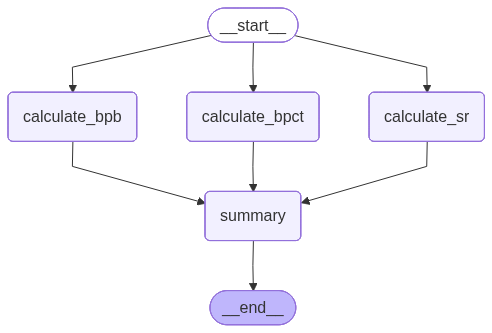

In [39]:
workflow = graph.compile()
workflow

In [42]:
from IPython.display import display,Markdown

initial_state = {
    'runs':120,
    'balls':30,
    'fours':10,
    'sixes':10
    }
final_state = workflow.invoke(initial_state)
display(Markdown(final_state['summary']))


    Strike rate - 400.0 

    Balls per boundary - 1.5 

    Boundary percent - 4050.0